In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# 한글 쓰는 방법
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Apple SD Gothic Neo


/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_78533/206075750.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [3]:
import os
# 현재 working directory 확인 방법
print(os.getcwd()) # 주피터에서
#pwd # 터미널에서 
# 데이터 있는 경로 확인
path = "/Users/jungtaekchoi/Google Drive/My Drive/fastcamp/datas"
# 경로 바꾸는 방법
os.chdir(path)
# 리스트 목록 확인
!ls

/Users/jungtaekchoi/Desktop/fastcamp/2. 데이터 전처리를 위한 라이브러리
Fastcampus_data_after_cleaning.csv
country.csv
sakila-data.sql
sakila-schema.sql
world.sql
수업.sql
수업2-2.sql
수업2.sql
데이터분석프로젝트_VER2_210329_210926.xlsx


In [38]:
df = pd.read_csv(path + "/Fastcampus_data_after_cleaning.csv")

In [40]:
df.dropna()

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04 00:00:00
3,3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04 00:00:00
4,4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14 00:00:00
5,5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105390,105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15 00:00:00
105391,105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 00:00:00
105392,105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 00:00:00
105393,105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 00:00:00


In [48]:
df[(df.type == "REFUND") | (df.type == "PAYMENT") & (df.state == "COMPLETED")].customer_id

2          72297.0
4         478028.0
8         478033.0
10        469860.0
14        478035.0
            ...   
105387    669238.0
105388    384003.0
105389    670891.0
105392    640697.0
105394    610626.0
Name: customer_id, Length: 56722, dtype: float64

In [ ]:
df[(df.type == "PAYE") | (df.type == "PAYMENT")].customer_id.count()

In [25]:
df[(df.type == "REFUND")]

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
651,651,972377,444760.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,없음,0.0,404000.0,TOSS,VBANK,없음,NaN
652,652,972381,472666.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02 00:00:00
666,666,972409,447177.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,없음,0.0,89000.0,TOSS,CARD,일러스트,2021-02-19 00:00:00
672,672,972422,373915.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,없음,0.0,340000.0,TOSS,VBANK,없음,2021-03-08 00:00:00
675,675,972436,456086.0,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105146,105169,1363708,600073.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,없음,0.0,179000.0,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00
105152,105175,1363721,645911.0,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,없음,0.0,1400000.0,INICIS,CARD,없음,NaN
105181,105205,1363934,506356.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,없음,0.0,259000.0,NAVER,CARD,영상 편집,2021-08-17 00:00:00
105221,105245,1364149,604077.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,없음,0.0,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00


In [7]:
# 쿠폰은 없는데 판매가 결재금액과 다르면 포인트라고 지정해주자
df.loc[(df.transaction_amount != df.sale_price) & 
       (df.coupon_title == "없음") & 
       (df.type == "PAYMENT") &
       (df.state == "COMPLETED"), "coupon_title"] = "포인트"

In [8]:
# (df.type == "ORDER") & (df.state == "COMPLETED")인 경우는 날리자
df[(df.type == "ORDER") &
   (df.state == "COMPLETED")]

df[(df.type == "ORDER")].state.value_counts()

CANCELLED    34122
COMPLETED     6035
Name: state, dtype: int64

In [9]:
target_df = df[(df.type == "PAYMENT") & (df.state == "COMPLETED")]
#target_df[target_df.category_title == "관리"]

In [18]:
target_df[target_df.marketing_start_at.isnull()]

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
18,18,970682,478031.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
46,46,970740,474451.0,PAYMENT,COMPLETED,올인원 패키지 : 디지털 마케팅 MAX 2020,마케팅,올인원,2021-03-28 16:28:42,114500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,134500.0,TOSS,CARD,디지털마케팅,NaN
48,48,970750,478091.0,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
57,57,970789,478098.0,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 16:52:29,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
64,64,970819,478118.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 반복 업무 자동화,업무 생산성,올인원,2021-03-28 17:06:49,99000,없음,0.0,99000.0,TOSS,CARD,업무자동화,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105351,105375,1364758,225684.0,PAYMENT,COMPLETED,"올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리",데이터사이언스,올인원,2021-09-25 08:51:57,218000,없음,0.0,218000.0,INICIS,VBANK,딥러닝/인공지능,NaN
105368,105392,1364863,666665.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-25 11:21:54,30000,없음,0.0,30000.0,INICIS,CARD,없음,NaN
105381,105405,1364925,670842.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-09-25 12:24:09,40000,없음,0.0,40000.0,INICIS,CARD,없음,NaN
105382,105406,1364929,120686.0,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,2021-09-25 12:29:39,481000,없음,0.0,481000.0,INICIS,CARD,없음,NaN


In [9]:
target_df.loc[: , 'completed_at'] = pd.to_datetime(target_df['completed_at'], yearfirst=True)
target_df.loc[: , 'marketing_start_at'] = pd.to_datetime(target_df['marketing_start_at'], yearfirst=True)

/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_57373/1773972016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[: , 'completed_at'] = pd.to_datetime(target_df['completed_at'], yearfirst=True)
/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_57373/1773972016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[: , 'marketing_start_at'] = pd.to_datetime(target_df['marketing_start_at'], yearfirst=True)


In [10]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52899 entries, 2 to 105394
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              52899 non-null  int64         
 1   id                      52899 non-null  int64         
 2   customer_id             52899 non-null  float64       
 3   type                    52899 non-null  object        
 4   state                   52899 non-null  object        
 5   course_title            52899 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52899 non-null  object        
 8   completed_at            52899 non-null  datetime64[ns]
 9   transaction_amount      52899 non-null  int64         
 10  coupon_title            52899 non-null  object        
 11  coupon_discount_amount  52899 non-null  float64       
 12  sale_price              52899 non-null  float

In [11]:
### seasonality whenever there is a regular, periodic change in the mean of the series.
### repetitions over a day, a week, or a year are common

In [12]:
ctg_df = target_df.groupby(["category_title"]).resample("d", on = "completed_at").sum()#.unstack(level = 0)

In [13]:
ctg_df = ctg_df["transaction_amount"]

In [14]:
ctg_df

category_title  completed_at
관리              2021-05-12        150000
교육              2021-03-29       9434000
                2021-03-30       7700000
                2021-03-31      10472150
                2021-04-01      23513975
                                  ...   
프로그래밍           2021-09-21       8935300
                2021-09-22      14106700
                2021-09-23      12008800
                2021-09-24      11140000
                2021-09-25       2794000
Name: transaction_amount, Length: 2046, dtype: int64

In [15]:
sub_name = list(ctg_df.index.get_level_values(0).unique())

In [16]:
sub_name

['관리',
 '교육',
 '데이터사이언스',
 '디자인',
 '마케팅',
 '부동산/금융',
 '비즈니스',
 '업무 생산성',
 '영상/3D',
 '지식콘텐츠',
 '크리에이티브',
 '투자/재테크',
 '파이낸스',
 '프로그래밍']

In [17]:
# 그래프 표현
plt.rc('axes', unicode_minus=False)
result = seasonal_decompose(ctg_df[sub_name], period=30)
#result.plot()

카테고리 = 관리 : 길이 너무 짧아서 패스
카테고리 = 파이낸스 : 길이 너무 짧아서 패스


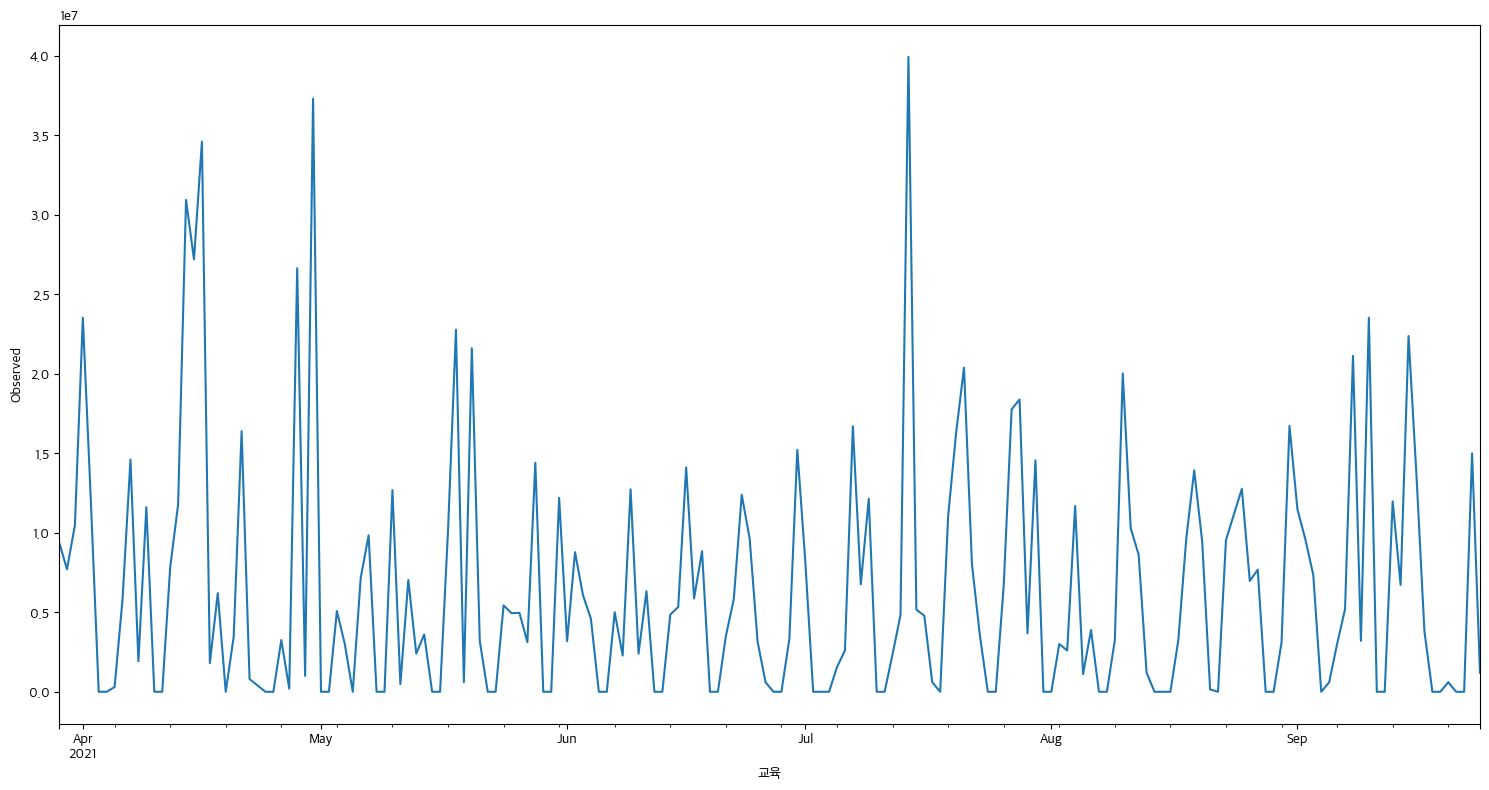

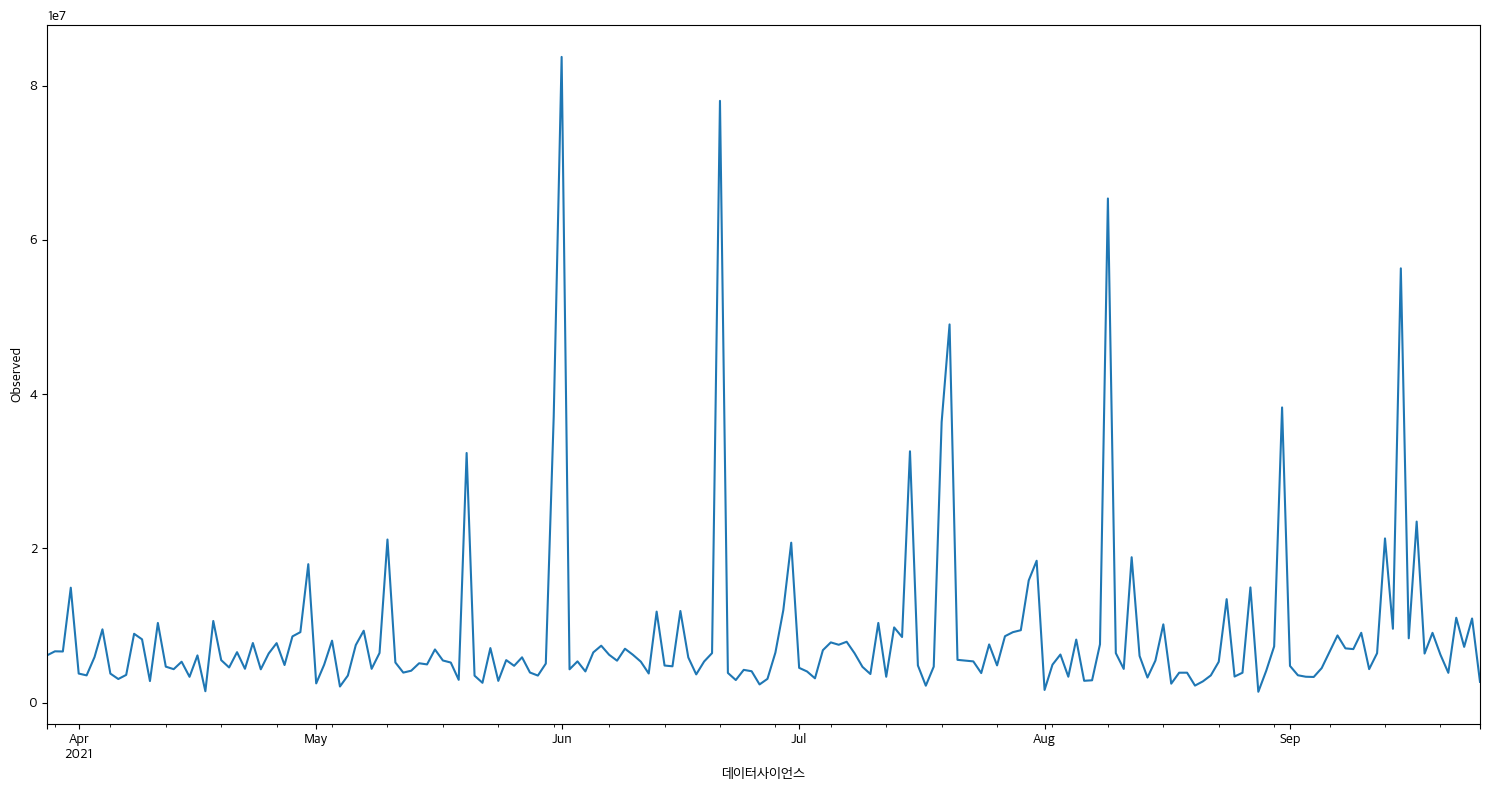

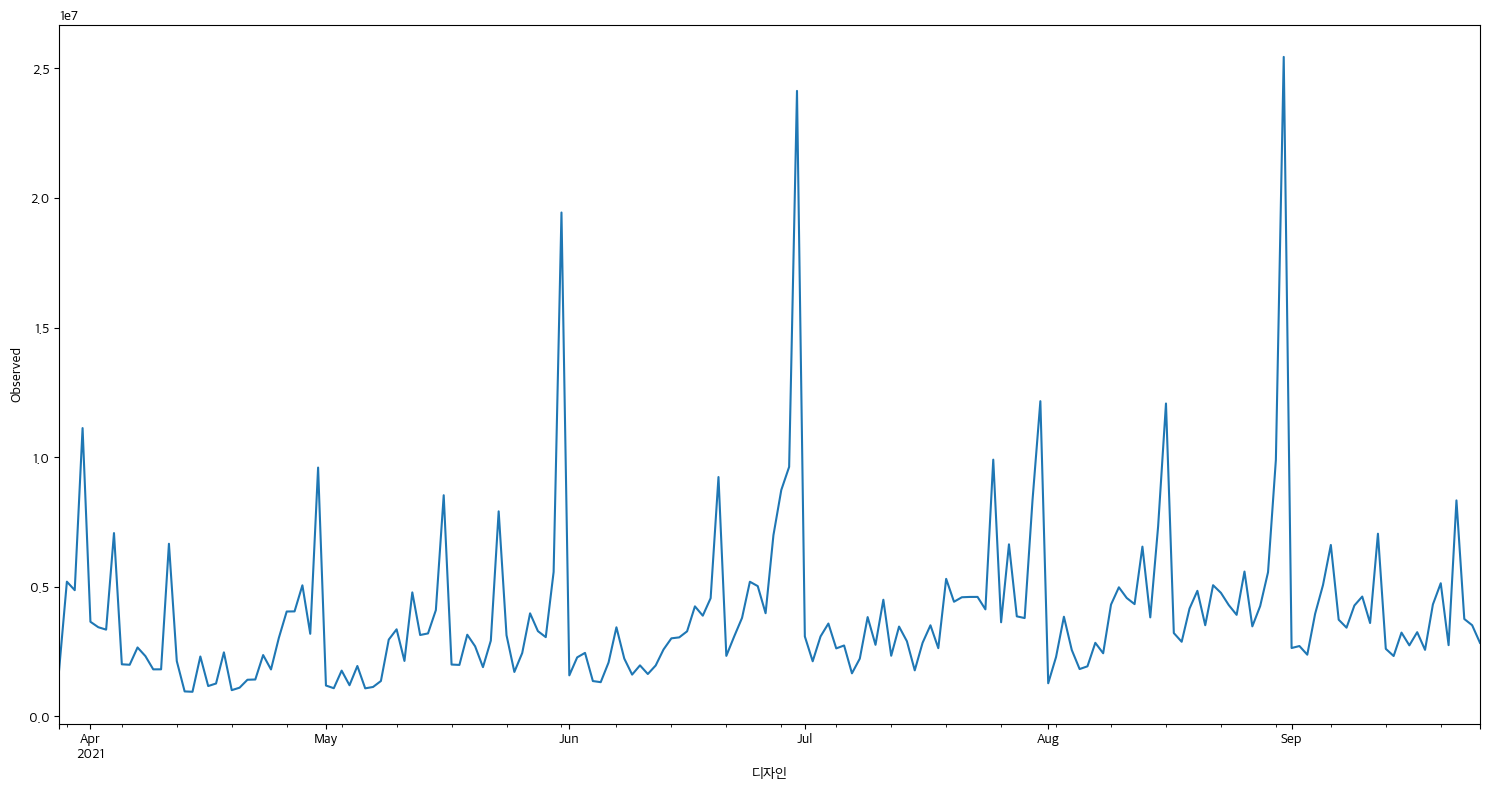

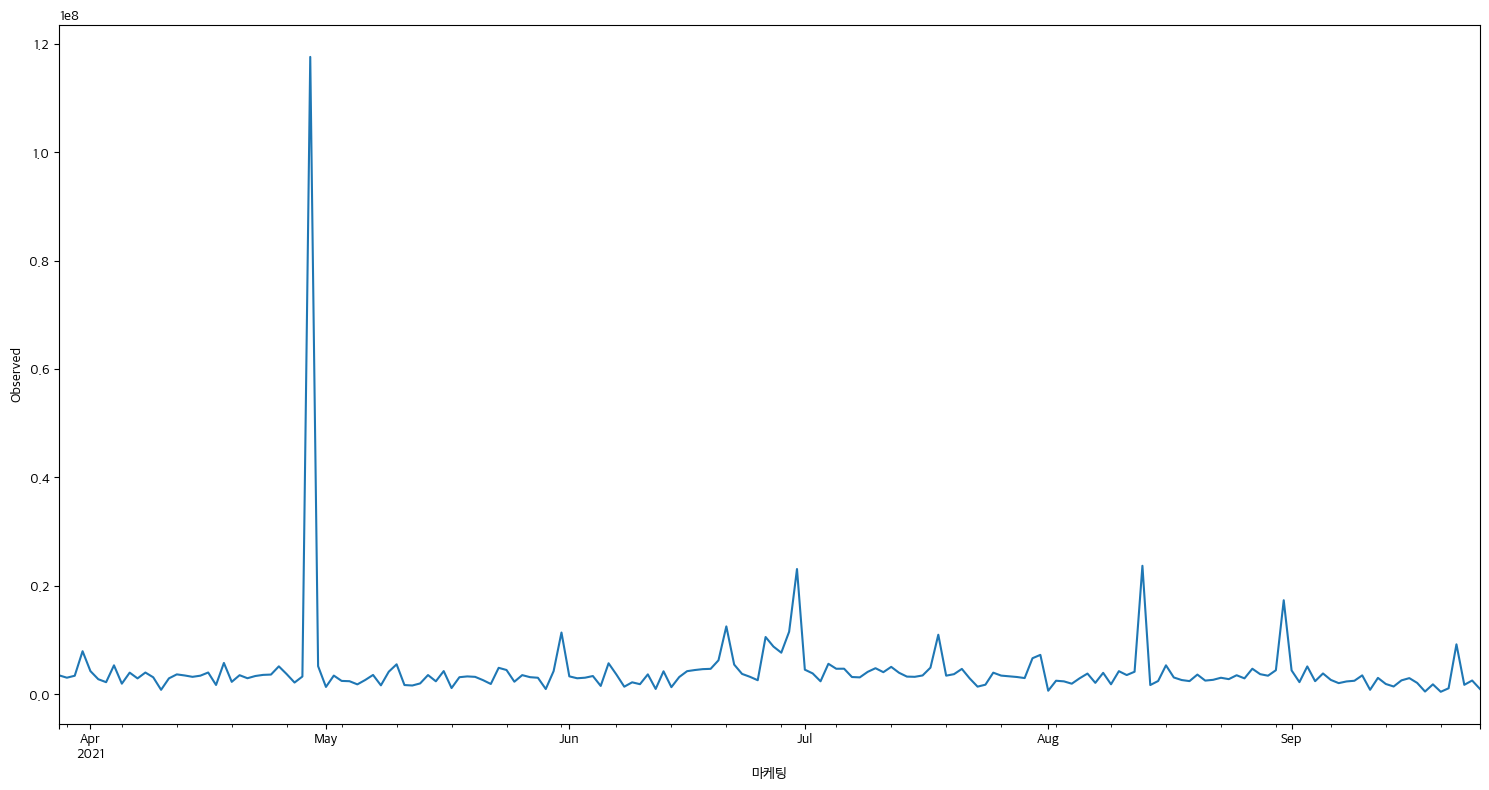

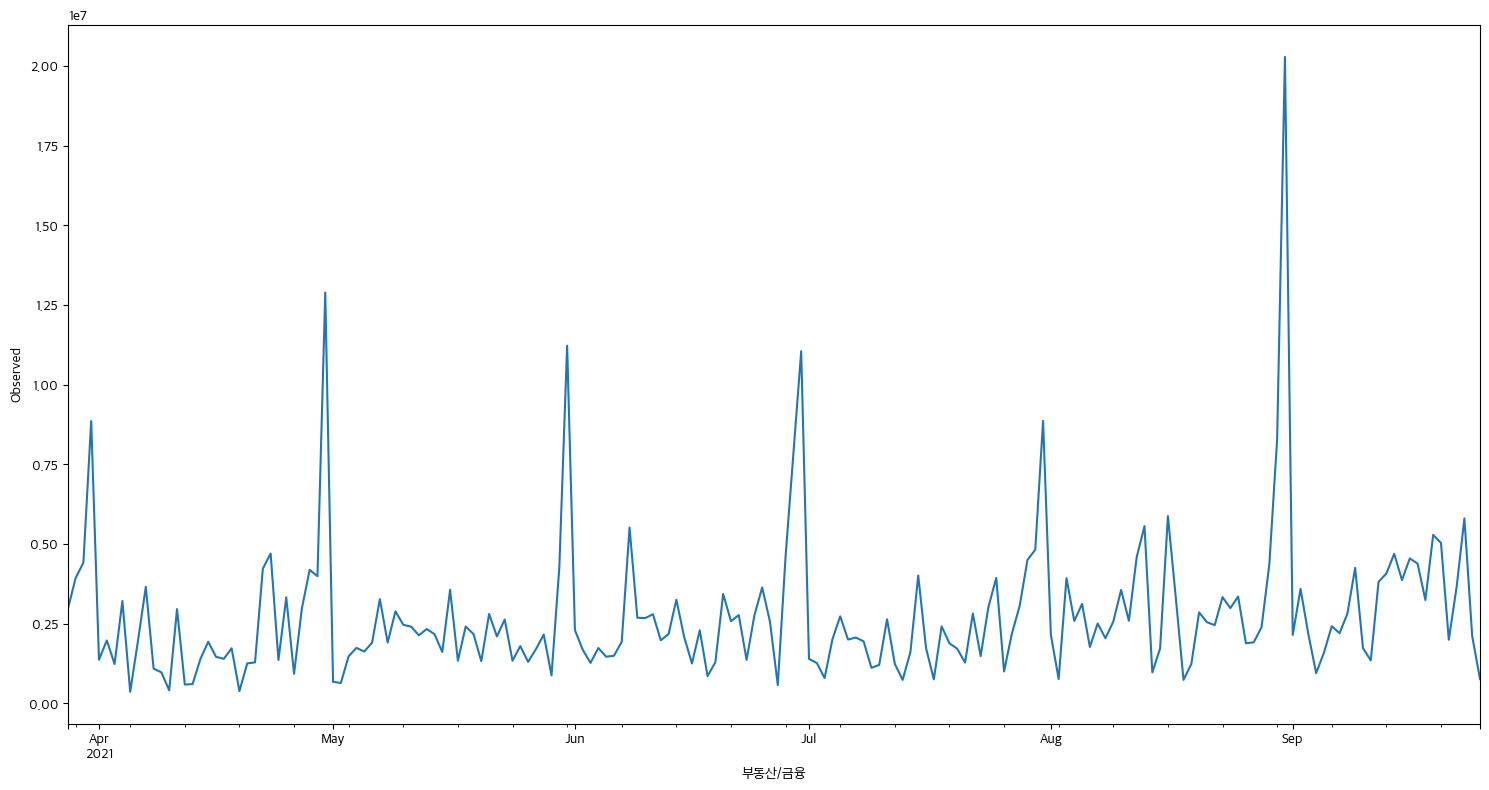

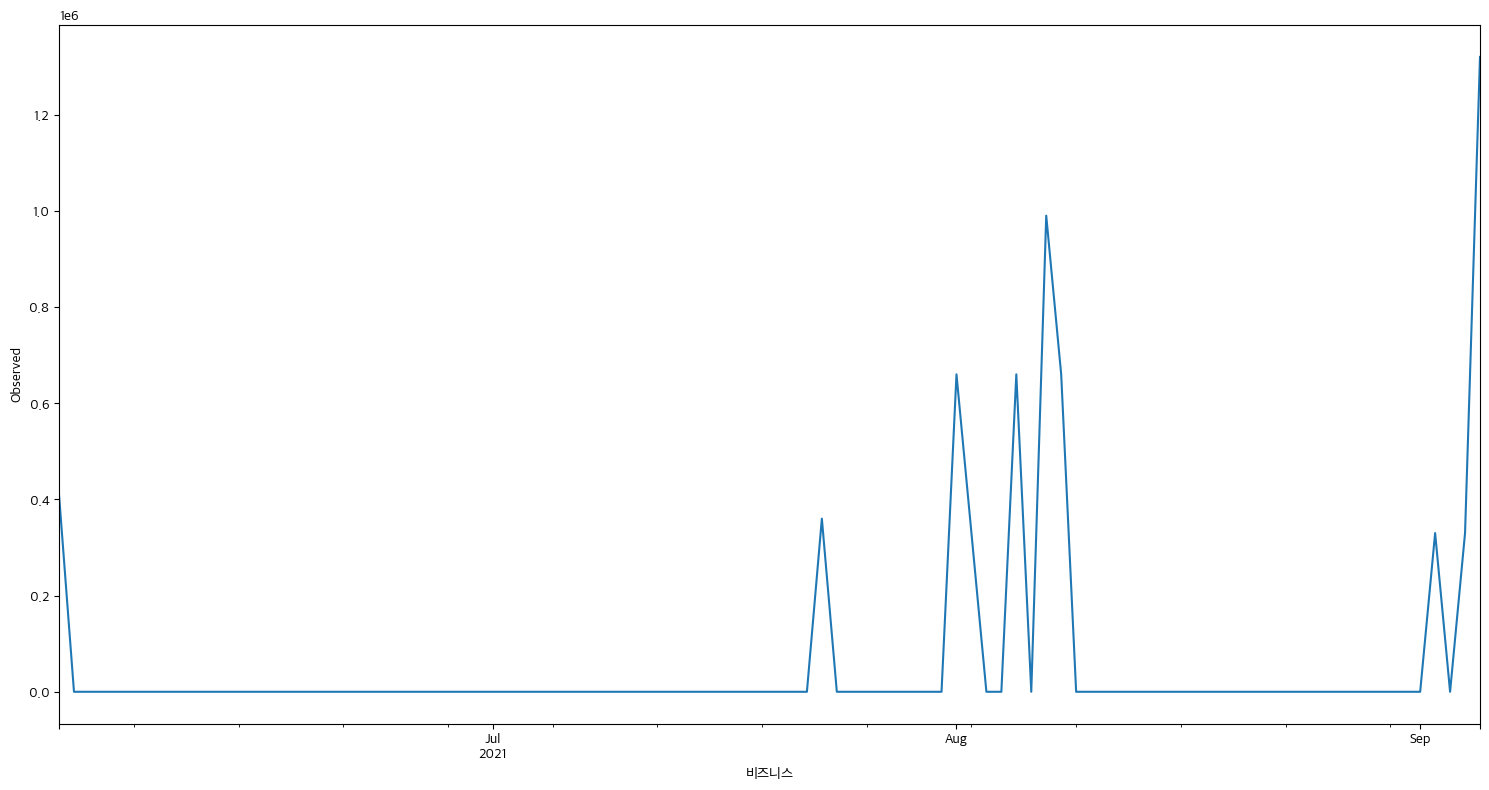

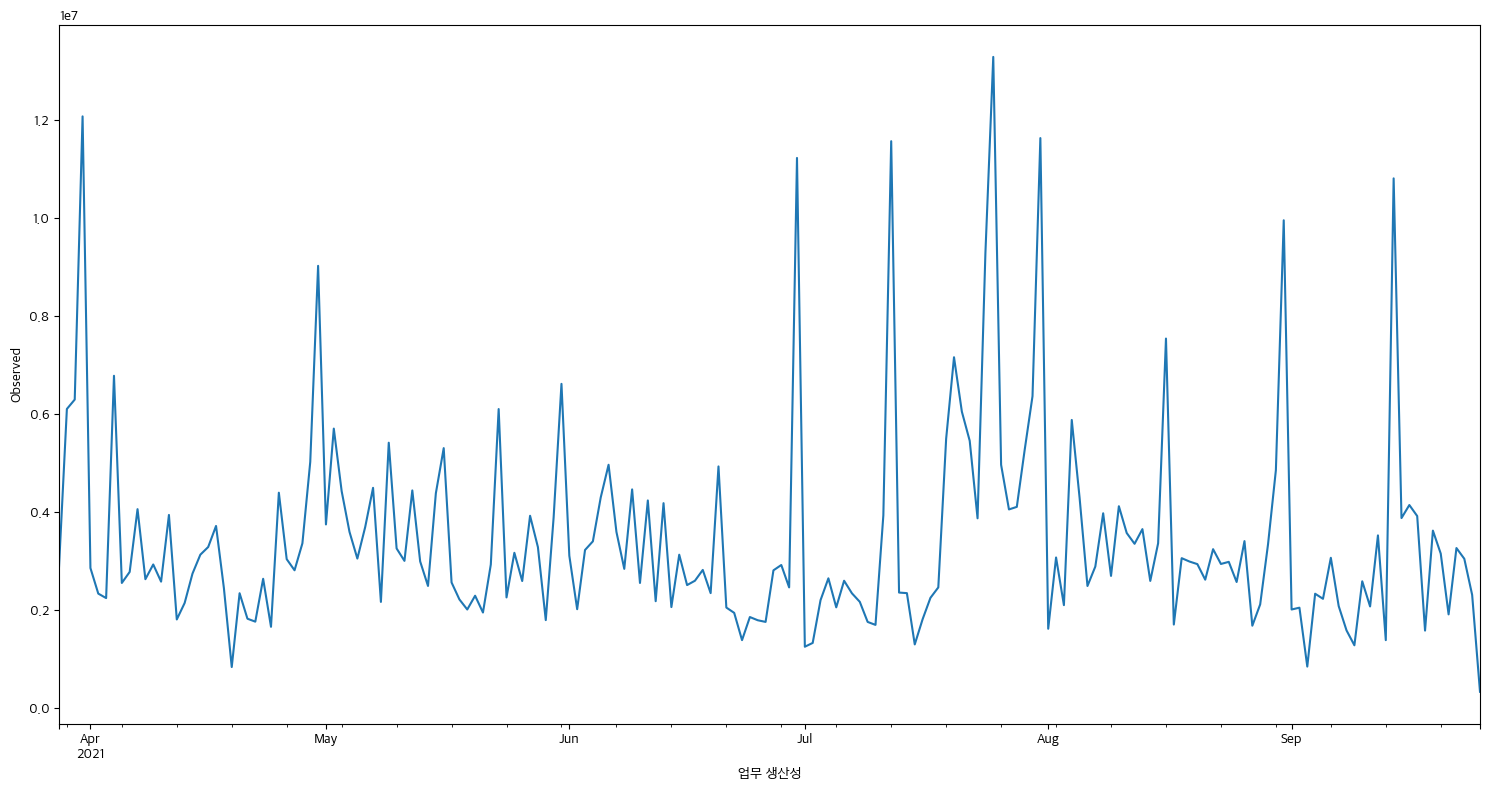

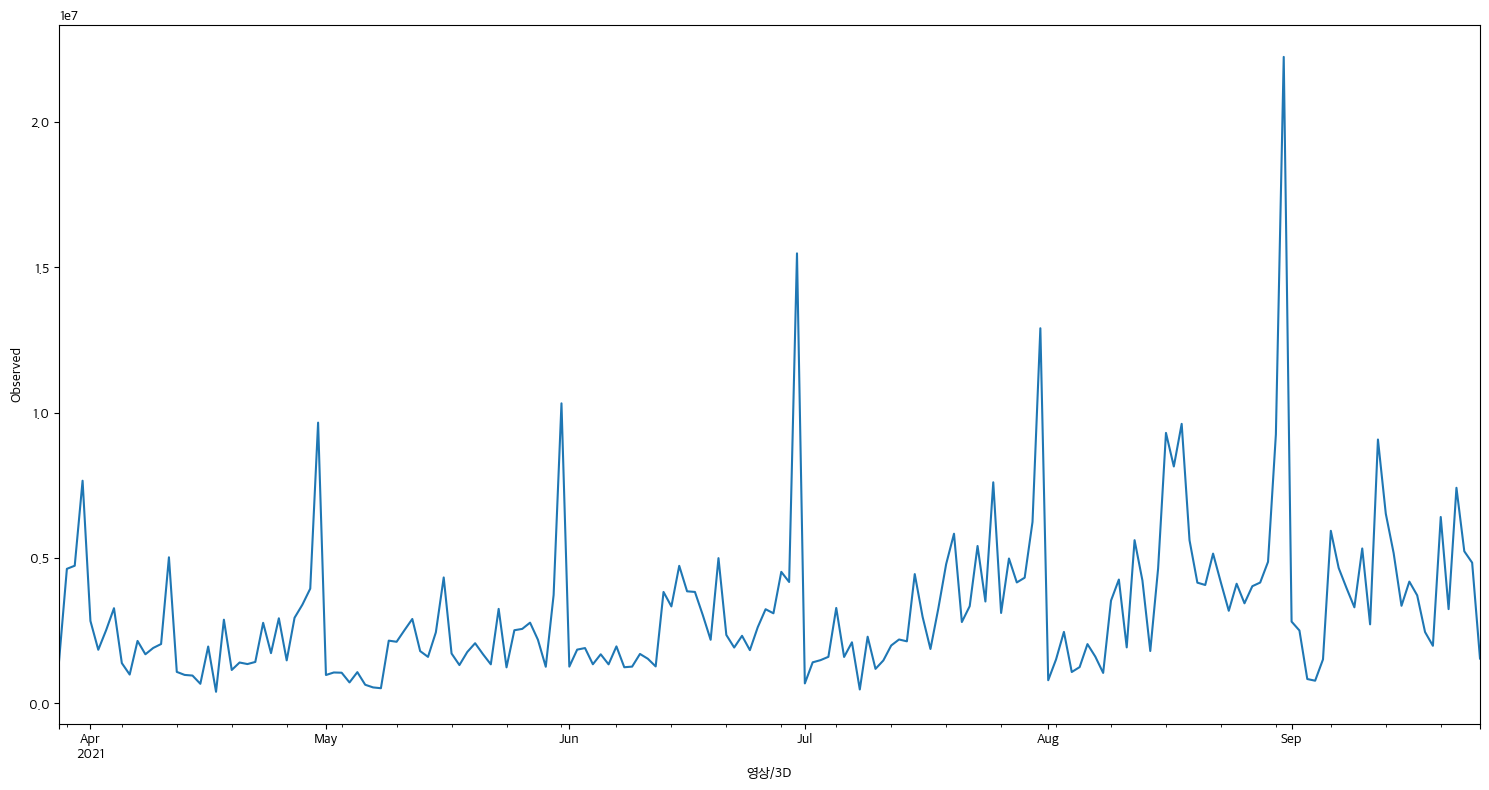

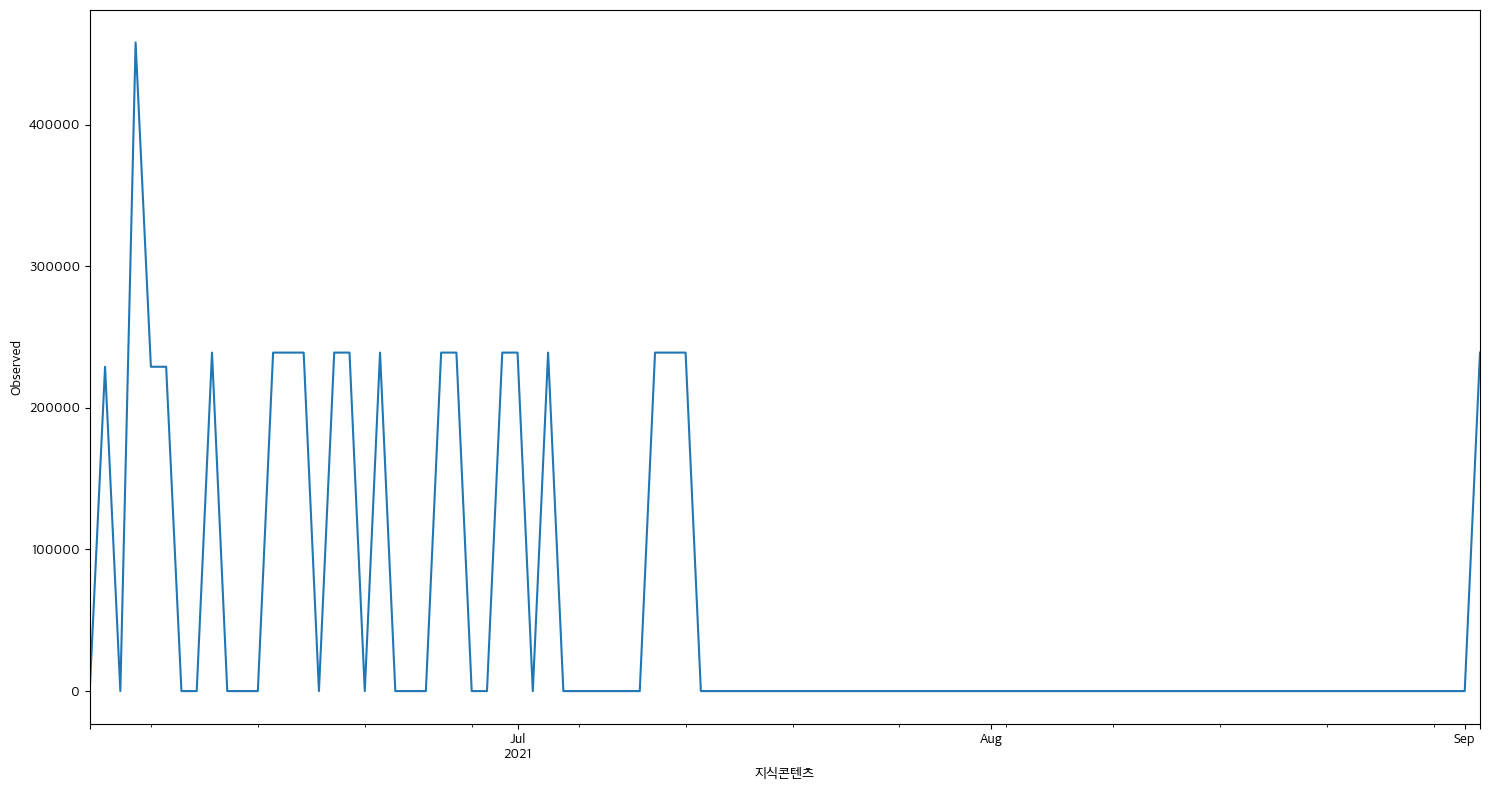

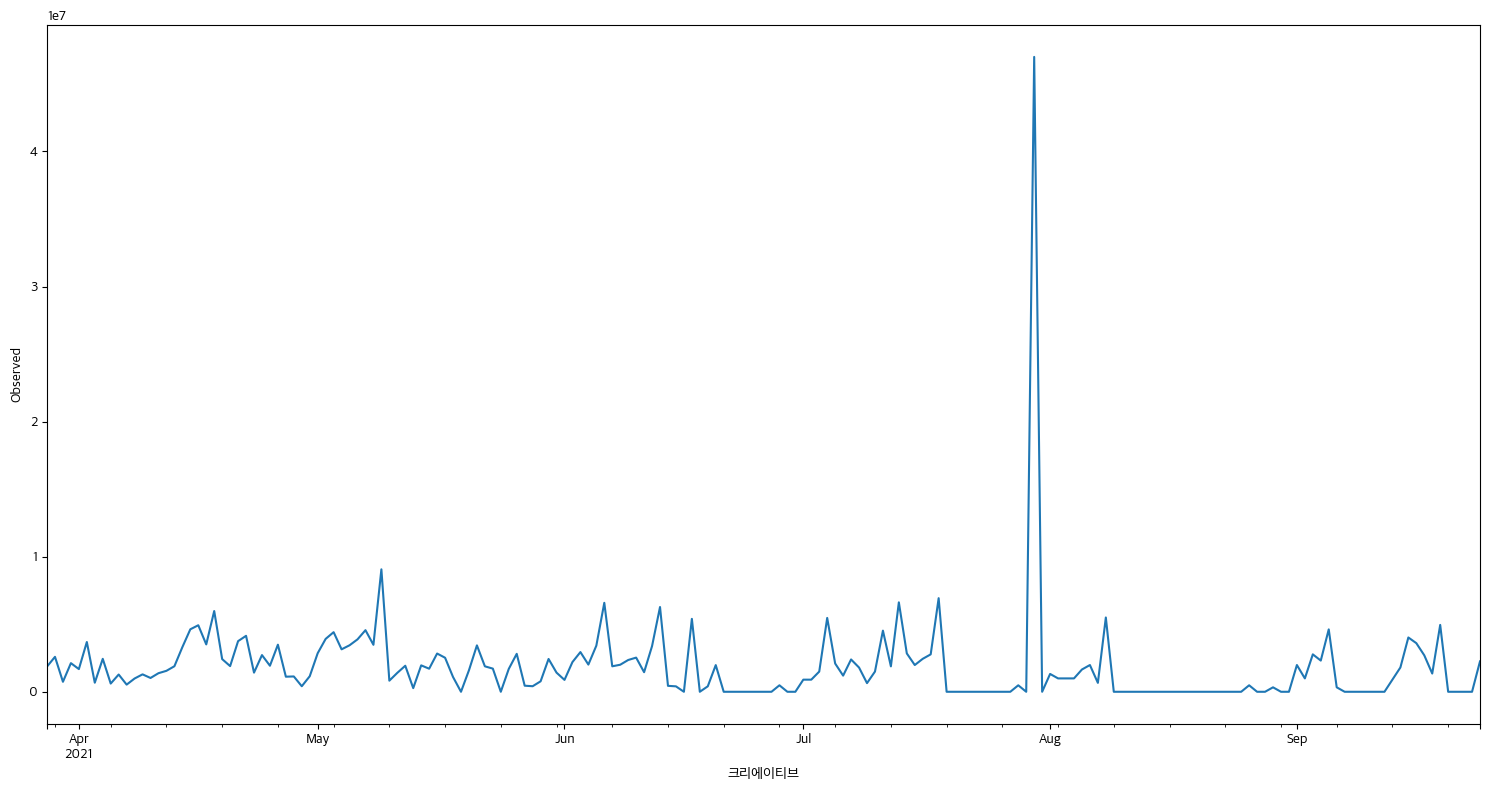

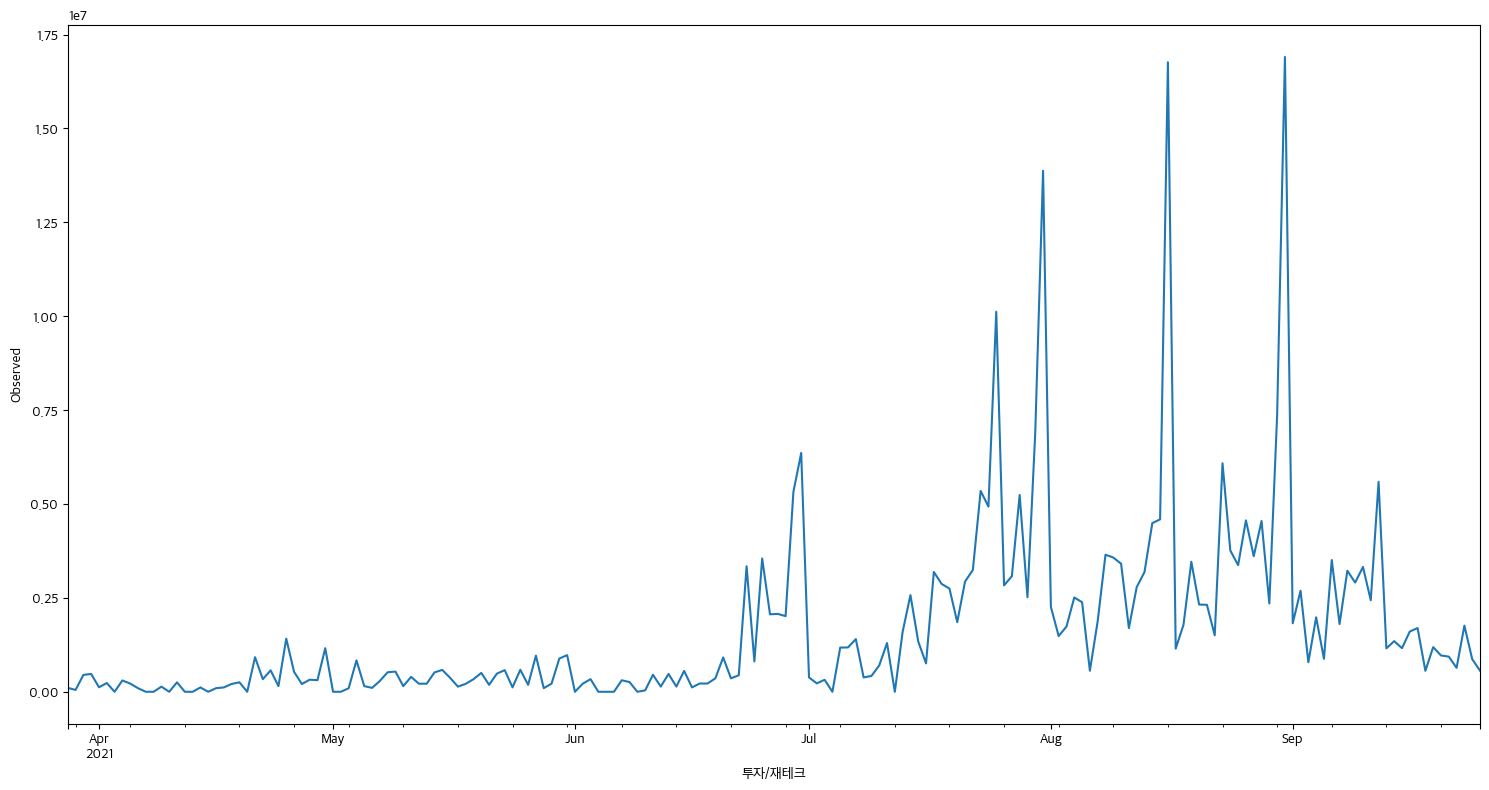

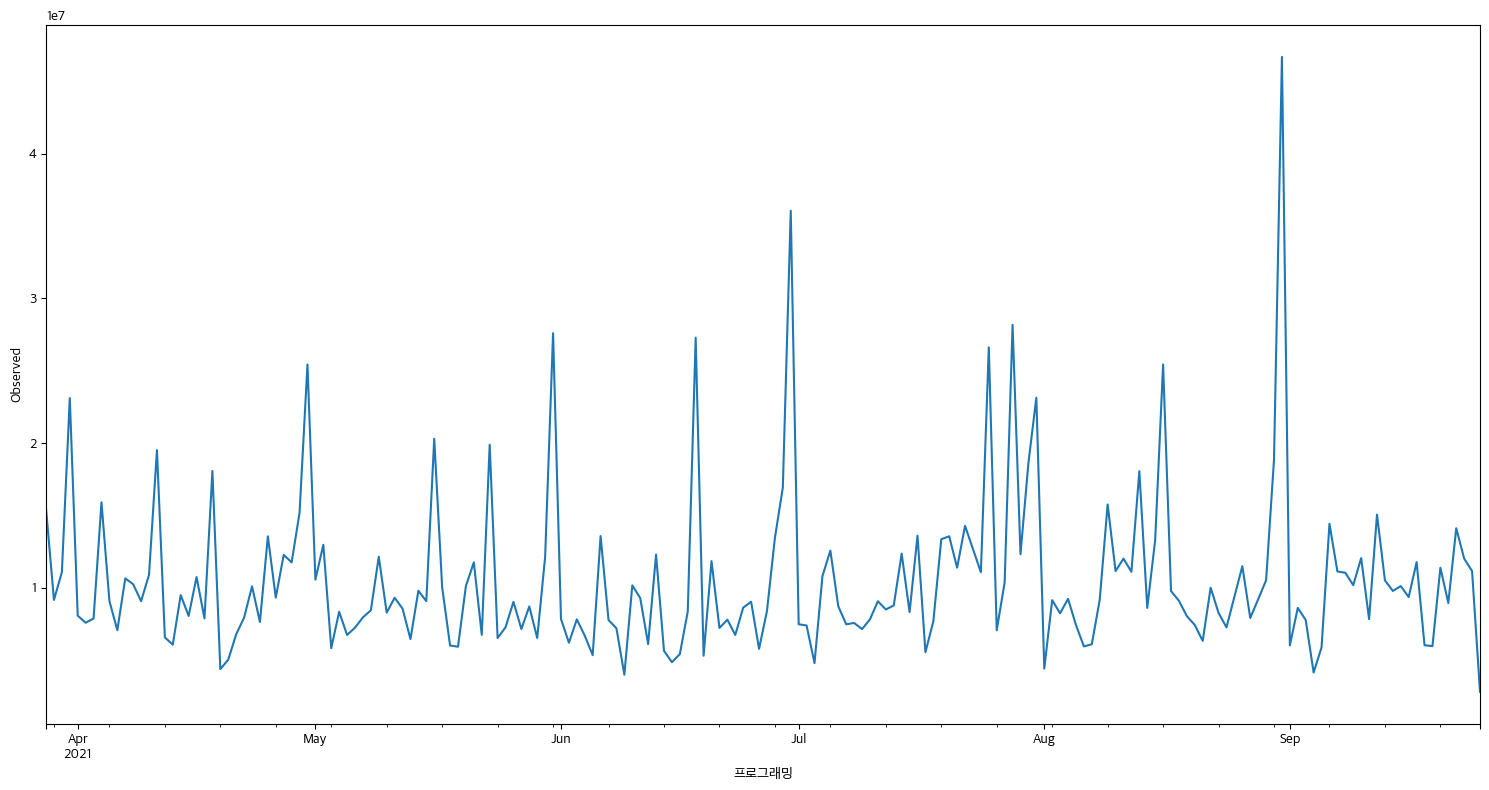

In [42]:
def plot_observed(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    ax1.set_xlabel(category_name)
    
for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_observed(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
def plot_trend(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.trend.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Trend')
    ax1.set_xlabel(category_name)
    
for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_trend(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

카테고리 = 관리 : 길이 너무 짧아서 패스
카테고리 = 파이낸스 : 길이 너무 짧아서 패스


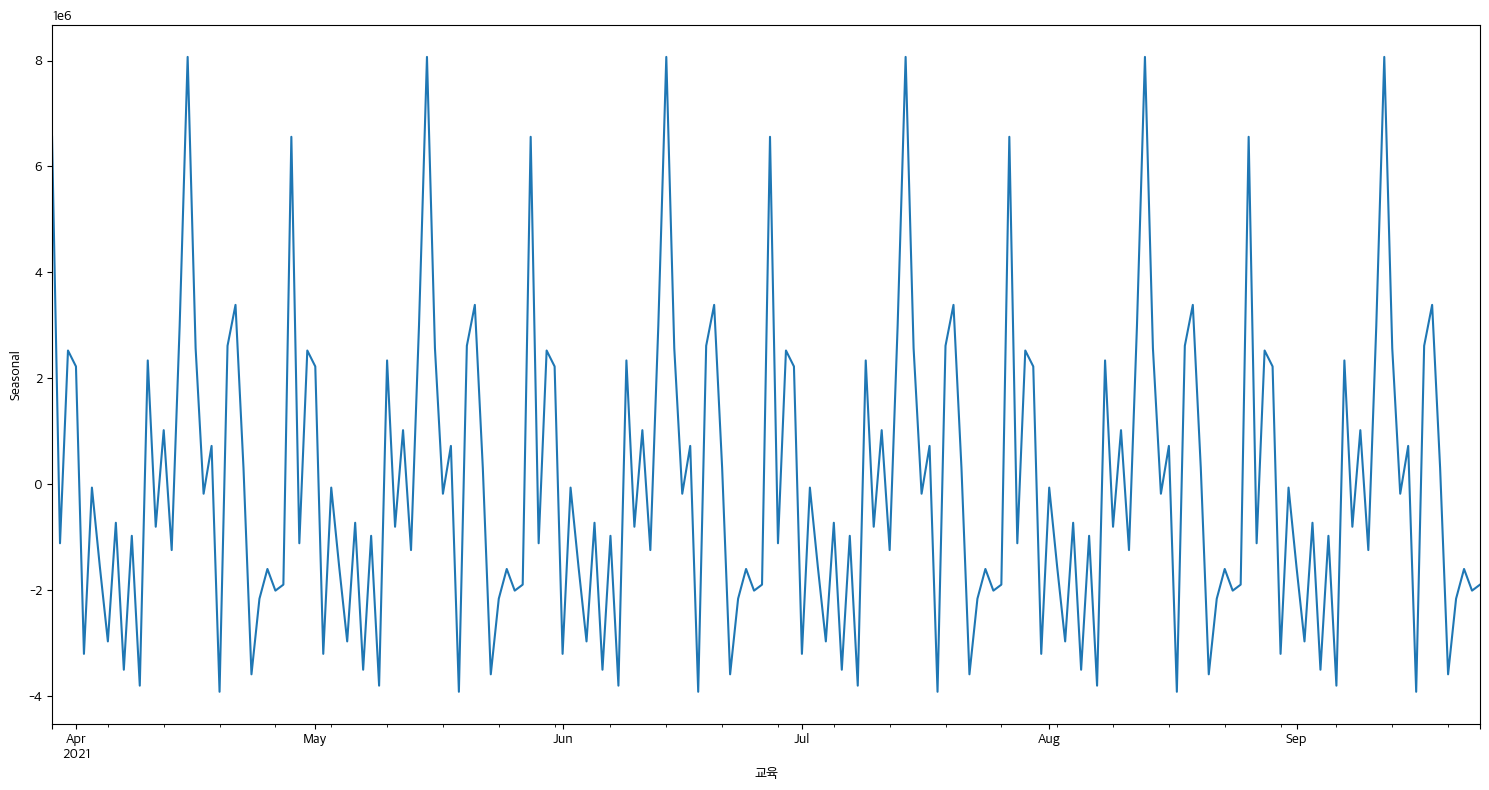

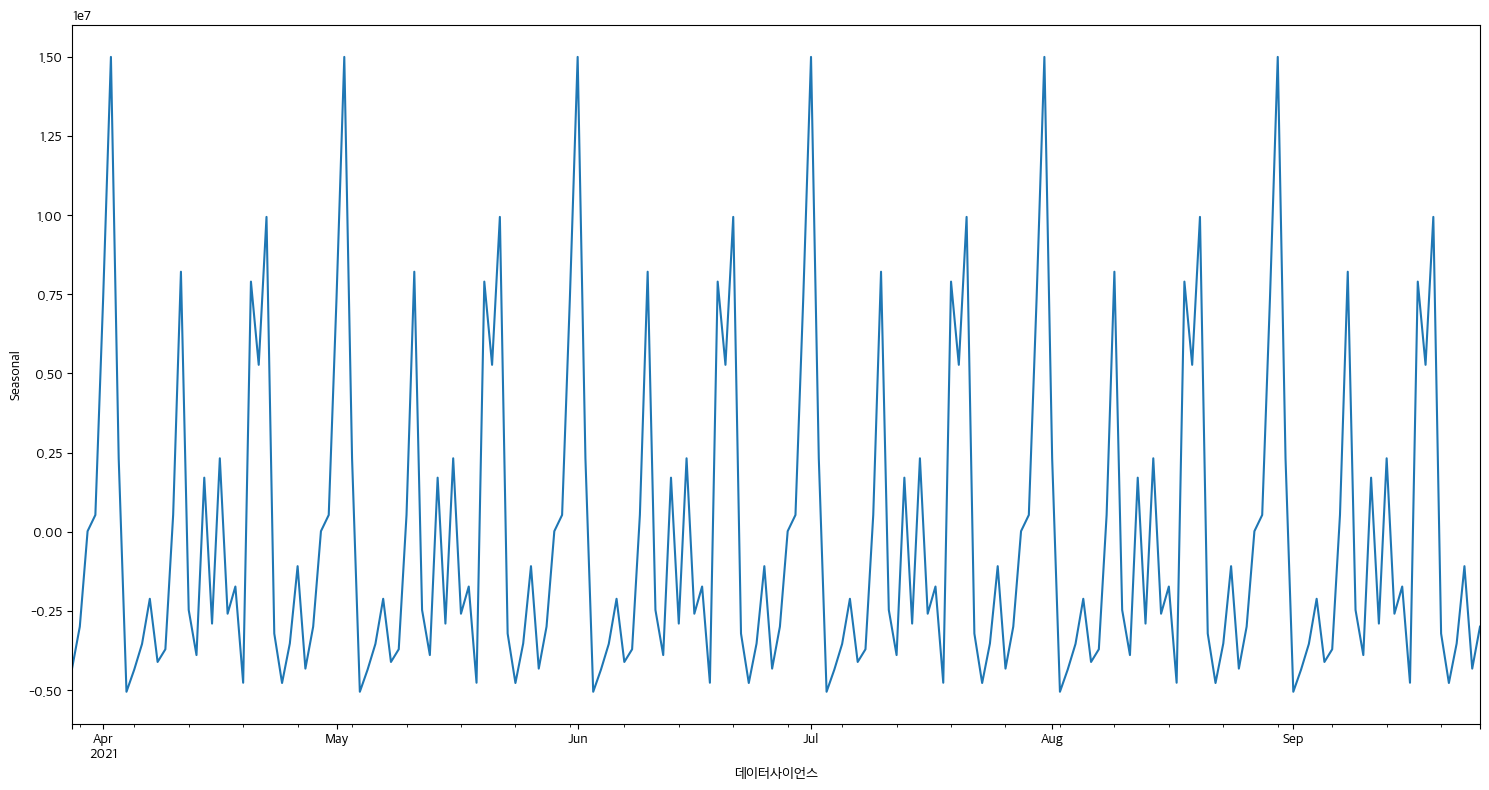

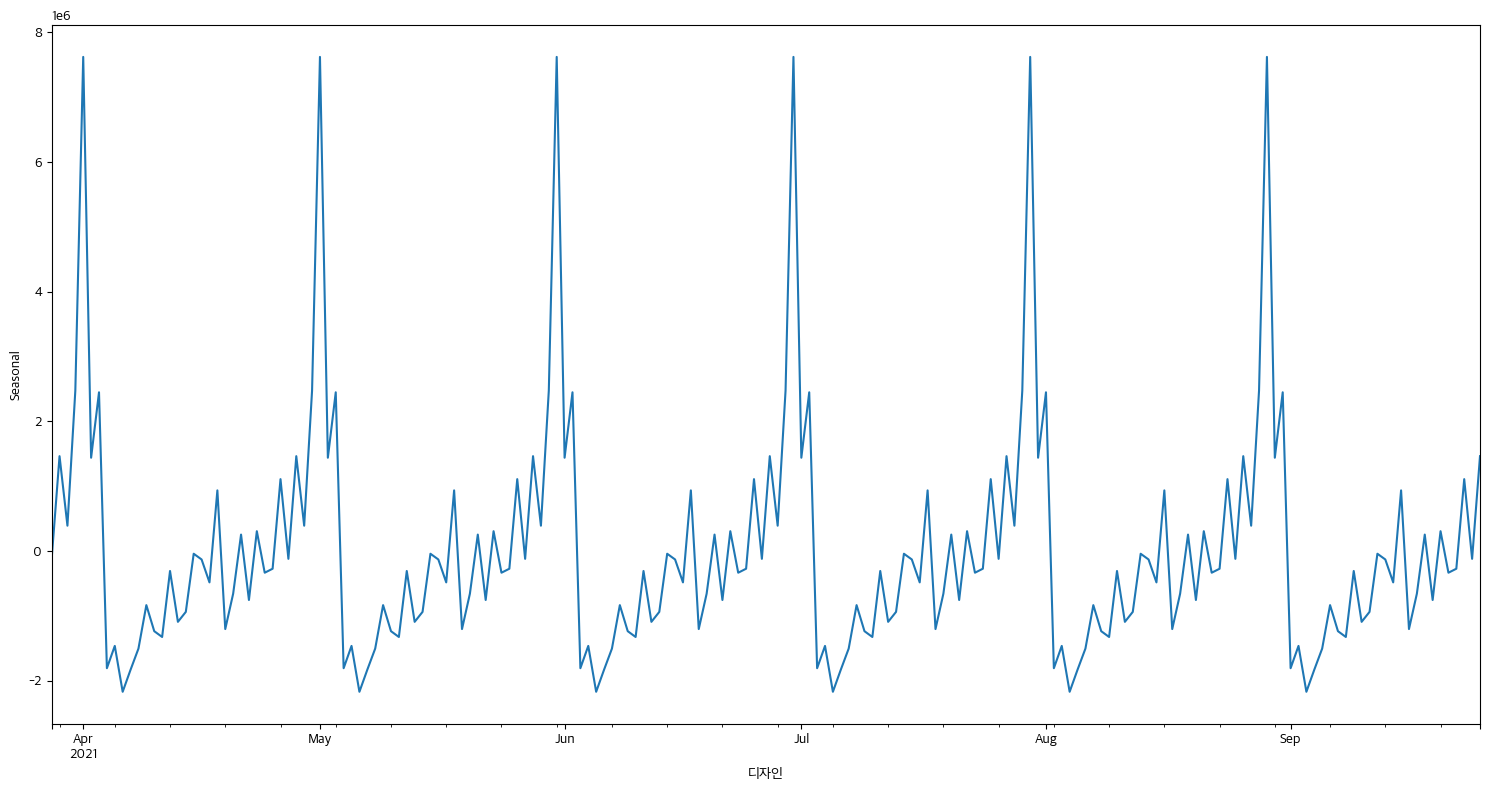

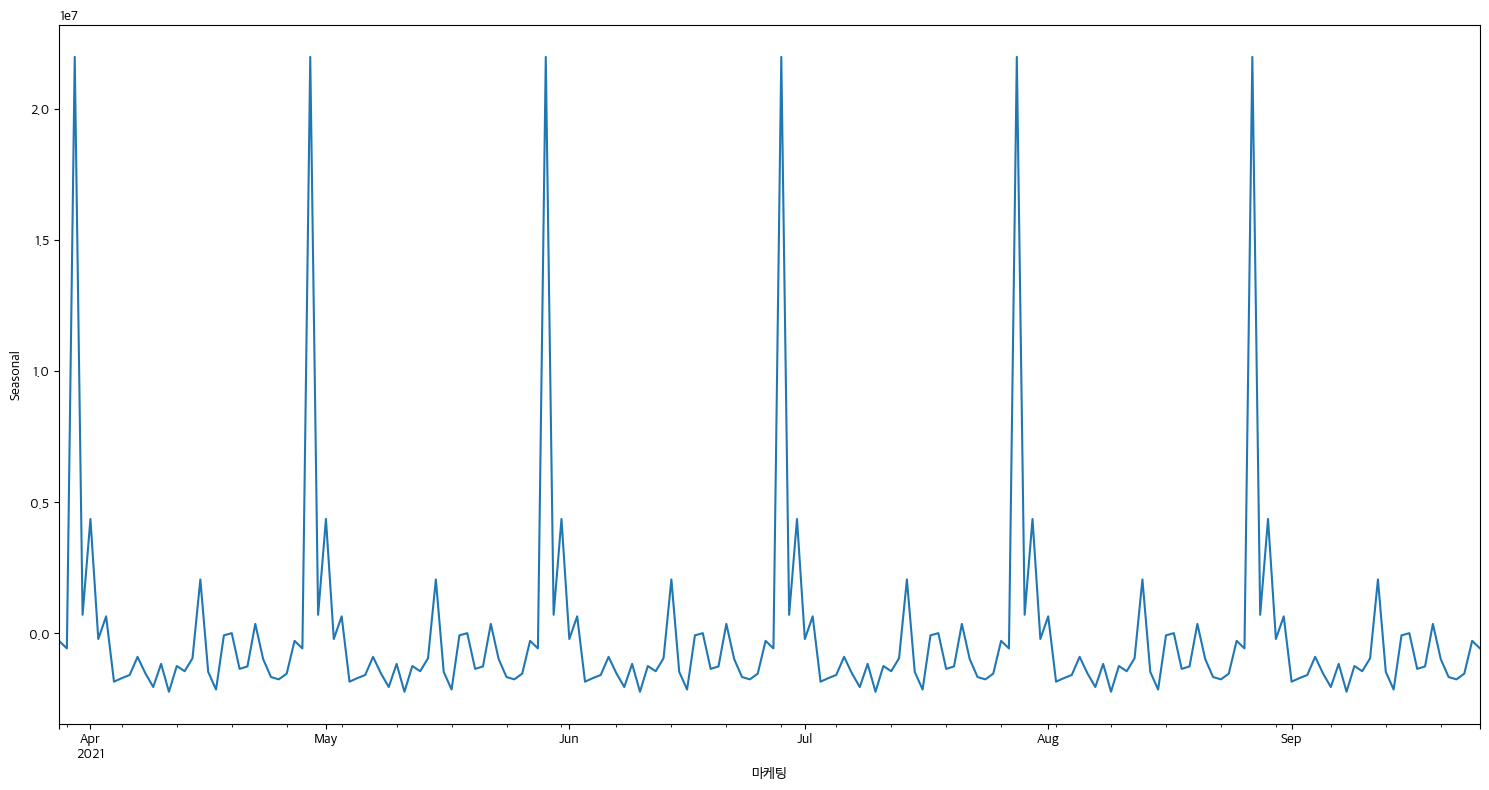

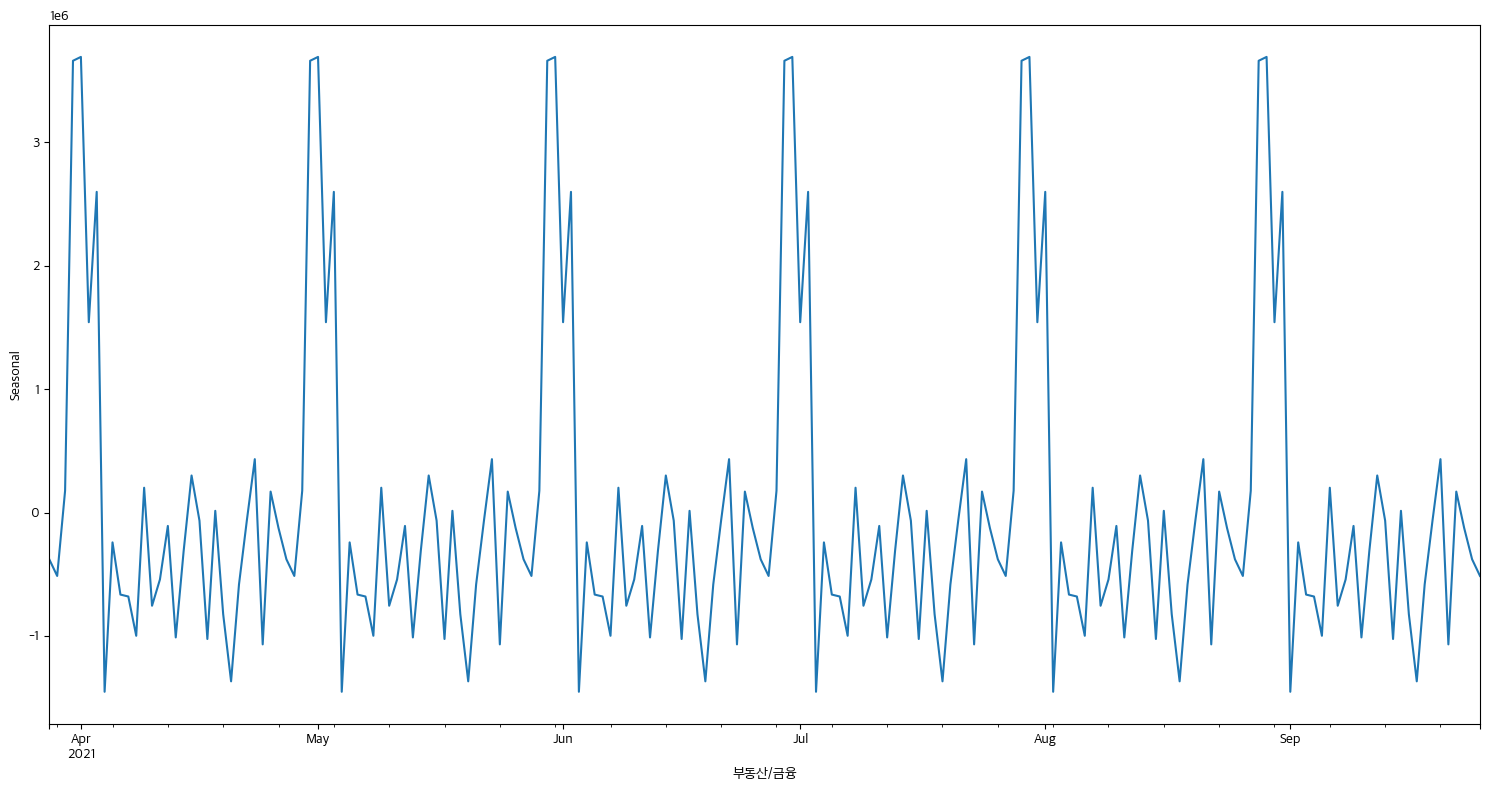

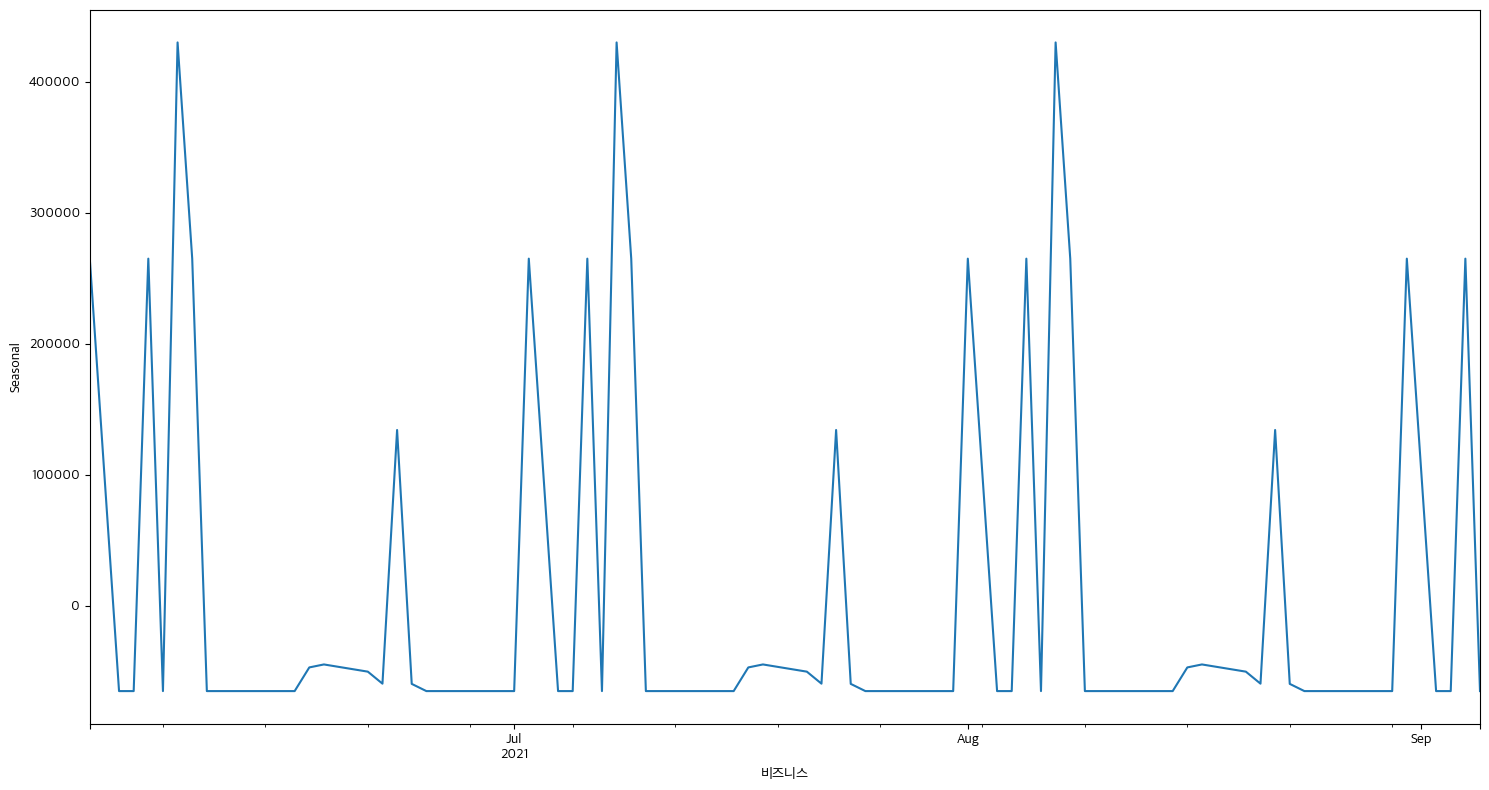

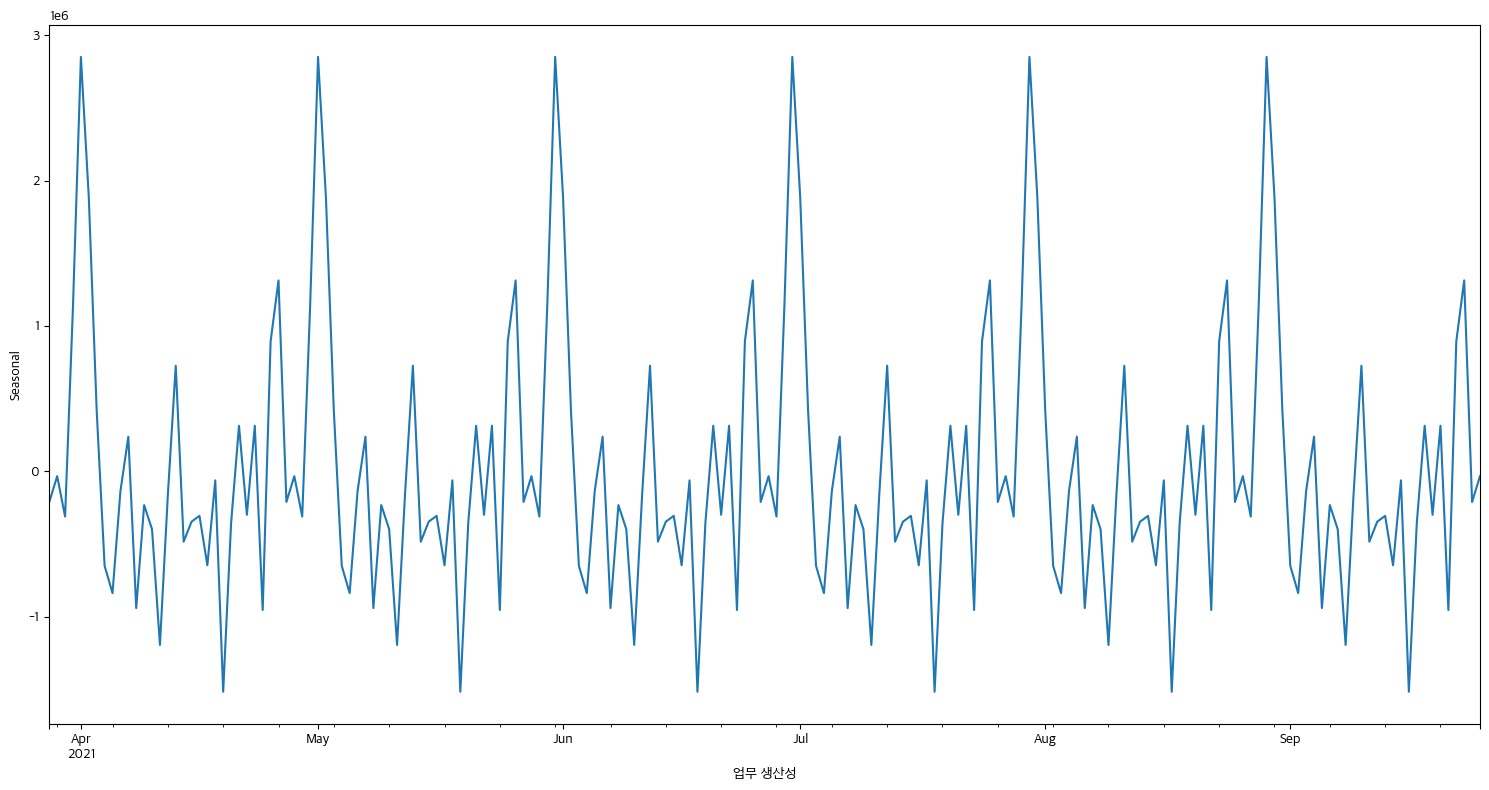

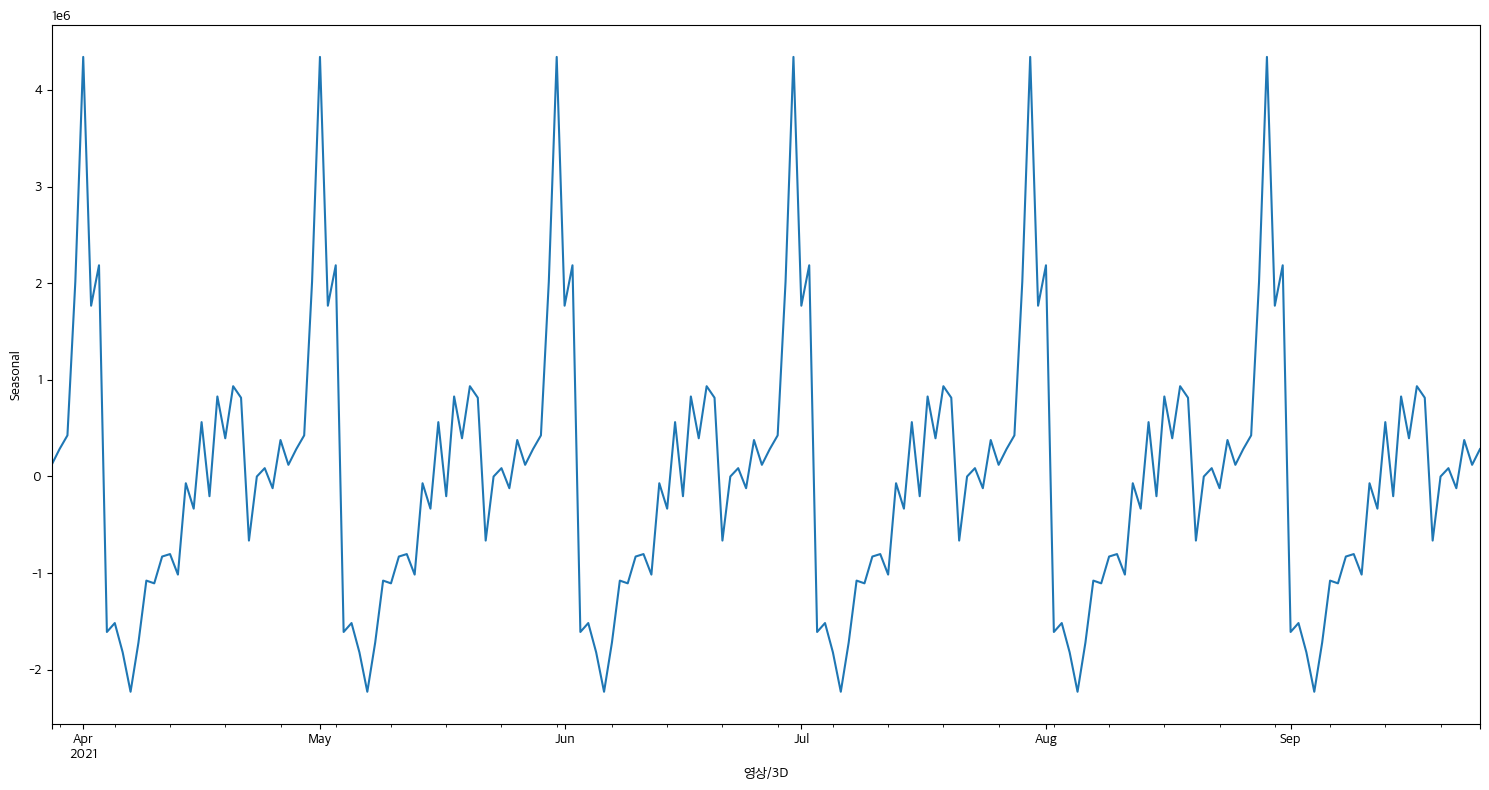

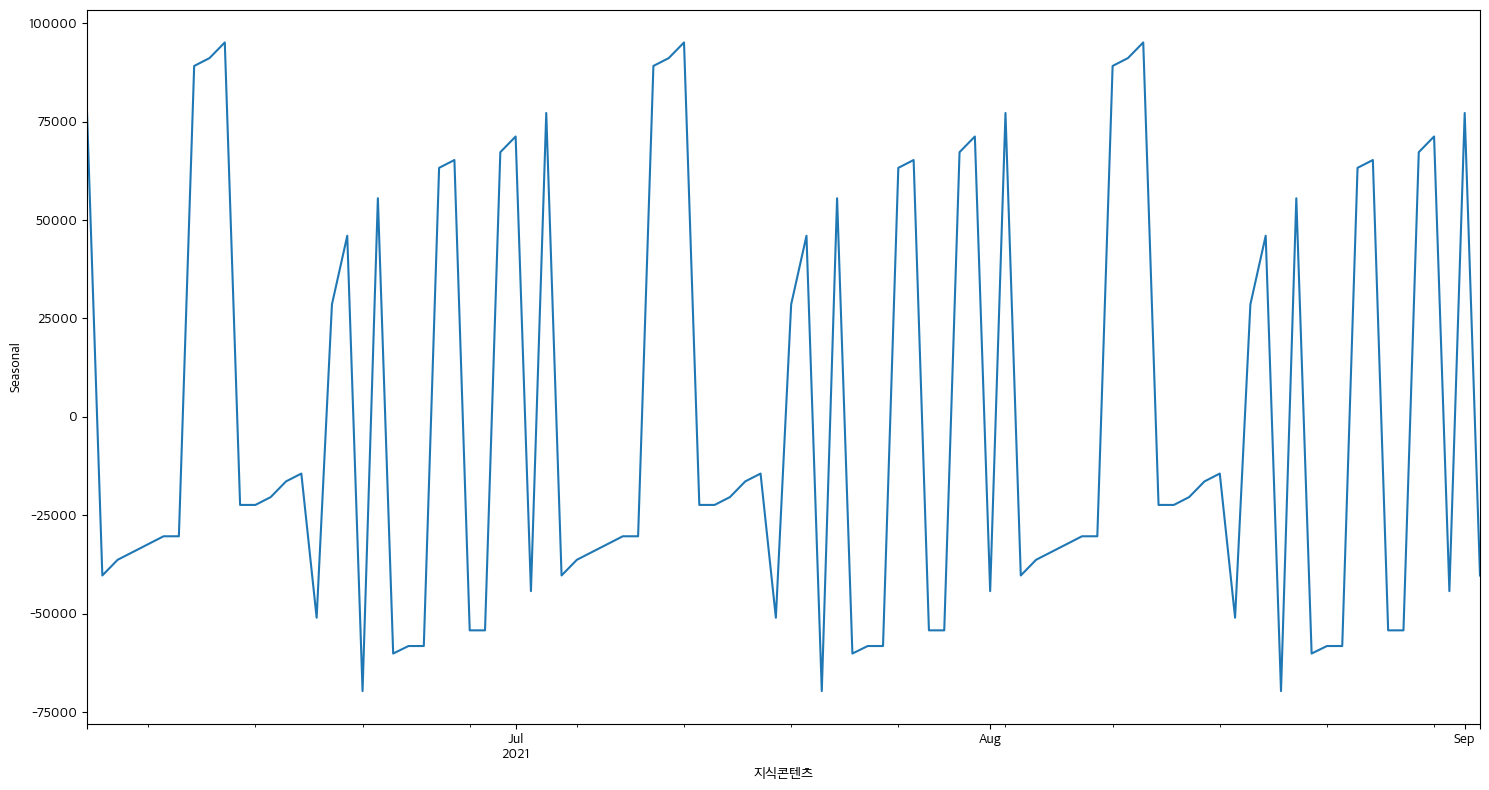

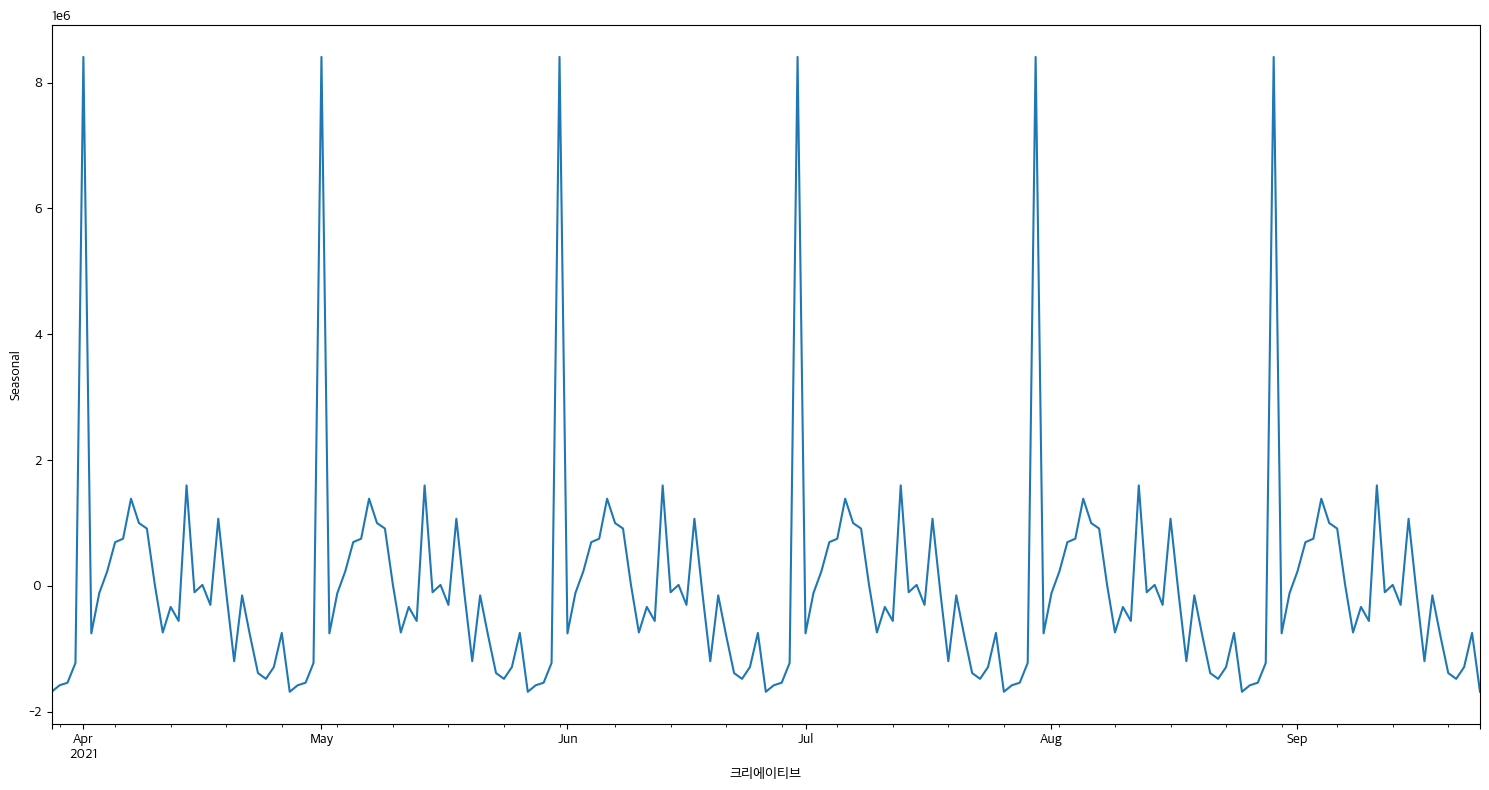

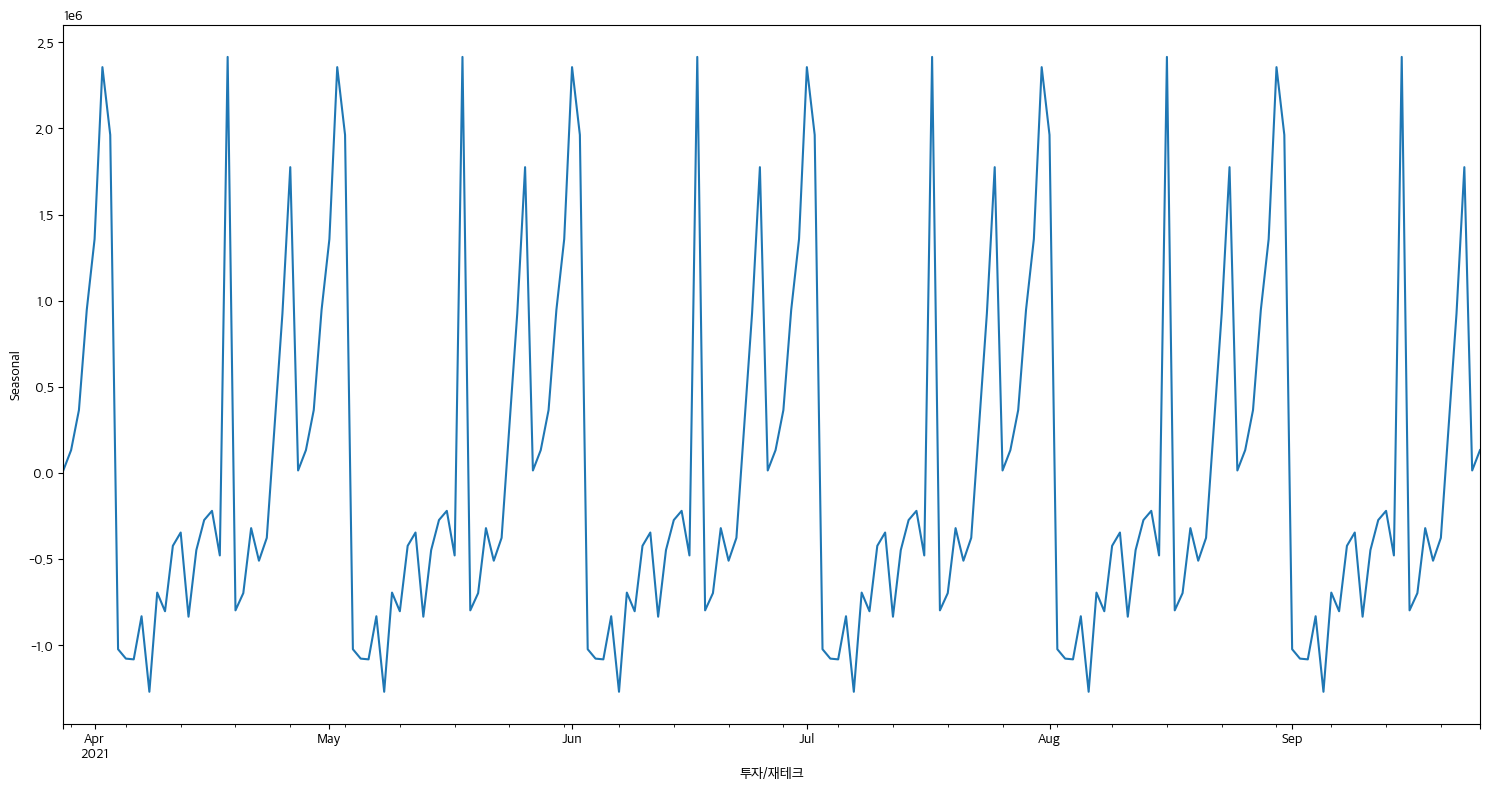

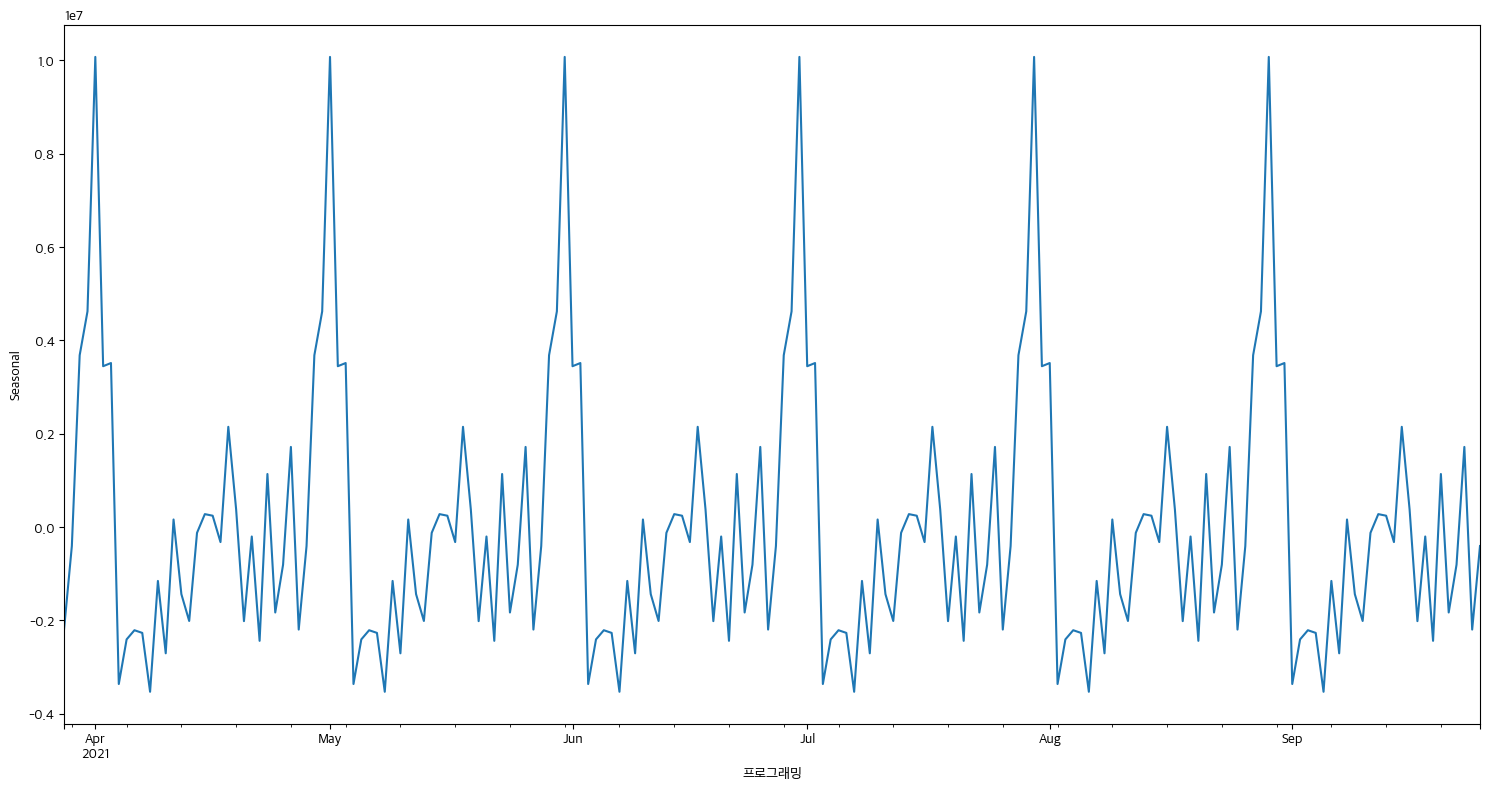

In [49]:
def plot_seasonal(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.seasonal.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Seasonal')
    ax1.set_xlabel(category_name)

for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_seasonal(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
def plot_resid(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.resid.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Residual')
    ax1.set_xlabel(category_name)

for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_resid(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
def get_rebal_dates(price_df, period="month"):
    _price_df = price_df.reset_index()
    if period == "month":
         groupby = [_price_df['date_time'].dt.year, _price_df['date_time'].dt.month]
    elif period == "quarter":
        groupby = [_price_df['date_time'].dt.year, _price_df['date_time'].dt.quarter]
    elif period == "halfyear":
        groupby = [_price_df['date_time'].dt.year, _price_df['date_time'].dt.month // 7]
    elif period == "year":
        groupby = [_price_df['date_time'].dt.year, _price_df['date_time'].dt.year]
    rebal_dates = pd.to_datetime(_price_df.groupby(groupby)['date_time'].last().values)
    return rebal_dates

In [ ]:
## 계절성 있다 없다 판단의 기준을 정해보자
## 월말 & 월초의 매출이 : 25일 기준으로 

In [41]:
### 결재총량을 가격으로 보고 nan값을 확인
### nan값 의미 = 그 날 한번도 결재가 없었던 날
#pd.DataFrame(ctg_df)
pd.DataFrame(ctg_df).unstack(level=0).isnull().sum()

                    category_title
transaction_amount  관리                181
                    교육                  2
                    데이터사이언스             0
                    디자인                 0
                    마케팅                 0
                    부동산/금융              0
                    비즈니스               86
                    업무 생산성              0
                    영상/3D               0
                    지식콘텐츠              90
                    크리에이티브              1
                    투자/재테크              0
                    파이낸스              142
                    프로그래밍               0
dtype: int64

In [39]:
# "관리" 포맷 = ['관리']
# 삭제 
df[(df.category_title == "관리") & (df.type == "PAYMENT") & (df.state == "COMPLETED")]#.format.unique()

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
32612,32620,1067142,496508.0,PAYMENT,COMPLETED,(TEST) 오프라인 과세 상품 결제 테스트용 상품,관리,관리,2021-05-12 17:31:06,150000,없음,0.0,150000.0,NAVER,TRANS,없음,NaN


In [40]:
# "교육" 포맷 = ['B2B 온라인', 'B2B']
# 교욱은 무조건 기업 대상이구나.
df[(df.category_title == "교육") & (df.type == "PAYMENT") & (df.state == "COMPLETED")]#.format.unique()

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
631,631,972364,478743.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,없음,0.0,100000.0,TOSS,TRANSFER,없음,NaN
633,633,972365,478745.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000,없음,0.0,750000.0,TOSS,TRANSFER,없음,NaN
1035,1035,973331,479082.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000,없음,0.0,600000.0,TOSS,CARD,없음,NaN
1046,1046,973363,474327.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000,없음,0.0,600000.0,TOSS,CARD,없음,NaN
1135,1135,973592,479185.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000,없음,0.0,600000.0,TOSS,CARD,없음,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104808,104831,1361297,669386.0,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000,없음,0.0,390000.0,TOSS,TRANSFER,없음,NaN
104809,104832,1361312,669400.0,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000,없음,0.0,1200000.0,TOSS,TRANSFER,없음,NaN
104882,104905,1367252,672301.0,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000,없음,0.0,2000000.0,TOSS,ONSITE,없음,NaN
105140,105163,1367258,672307.0,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000,없음,0.0,600000.0,TOSS,ONSITE,없음,NaN


In [33]:
# "지식콘텐츠" 포맷 = ['MBA']
# MBA는 학교 대상. 결국 B2B
# 지식콘텐츠도 결국은 기업 대상이다.
df[(df.category_title == "지식콘텐츠") & (df.type == "PAYMENT") & (df.state == "COMPLETED")].format.unique()

array(['MBA'], dtype=object)

In [32]:
# "비즈니스" 포맷 = ['하루10분컷', '온라인 완주반', 'B2B 온라인', '올인원']
df[(df.category_title == "비즈니스") & (df.type == "PAYMENT") & (df.state == "COMPLETED")].format.unique()

array(['하루10분컷', '온라인 완주반', 'B2B 온라인', '올인원'], dtype=object)

In [35]:
# "크리에이티브" 포맷 = ['올인원', '온라인 완주반', 'B2B 온라인', '이벤트', '아카이브', 'B2B']
# 아카이브는 모지??
# 무시
df[(df.category_title == "크리에이티브") & (df.type == "PAYMENT") & (df.state == "COMPLETED")]#.format.unique()

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
118,118,971012,428657.0,PAYMENT,COMPLETED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 18:44:19,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
213,213,971295,52710.0,PAYMENT,COMPLETED,프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 20:47:30,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
230,230,971346,401831.0,PAYMENT,COMPLETED,프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 21:05:36,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
251,251,971404,471493.0,PAYMENT,COMPLETED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 21:23:23,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
364,364,971626,436888.0,PAYMENT,COMPLETED,매주)서비스 기획서 완성 온라인 완주반 2101,크리에이티브,온라인 완주반,2021-03-28 22:30:18,367000,[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰,50000.0,417000.0,TOSS,CARD,없음,2021-01-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103901,103922,1355533,666708.0,PAYMENT,COMPLETED,프로모션 : 연봉 상승으로 가는 길! UX/UI 풀코스 무한패스 (9월 프리패스),크리에이티브,올인원,2021-09-19 22:52:47,450000,없음,0.0,450000.0,INICIS,CARD,없음,NaN
103913,103934,1355571,658577.0,PAYMENT,COMPLETED,프로모션 : 연봉 상승으로 가는 길! UX/UI 풀코스 무한패스 (9월 프리패스),크리에이티브,올인원,2021-09-19 23:10:00,450000,없음,0.0,450000.0,INICIS,CARD,없음,NaN
103919,103940,1355605,666803.0,PAYMENT,COMPLETED,프로모션 : 디자인은 이거 하나로 끝! 시각디자인 풀코스 무한패스 (9월 프리패스),크리에이티브,올인원,2021-09-19 23:27:30,450000,없음,0.0,450000.0,INICIS,CARD,없음,NaN
104998,105021,1362962,15407.0,PAYMENT,COMPLETED,프로모션 : 유튜브 영상제작 맥북 pro 패스 (9월 현물 프리패스),크리에이티브,올인원,2021-09-24 03:36:12,1800000,없음,0.0,1800000.0,KAKAO,POINT,없음,NaN


In [37]:
# "파이낸스" 포맷 = ['B2B 온라인', '올인원']
df[(df.category_title == "파이낸스") & (df.type == "PAYMENT") & (df.state == "COMPLETED")].format.unique()

array(['B2B 온라인', '올인원'], dtype=object)

In [48]:
# 파이낸스 포맷 = ['B2B 온라인', '올인원']
# B2B 온라인 : 결재 한번만 존재
# 올인원 : 프로모션이 있는 월초에만 구매가 일어났구나 
df[(df.category_title == "파이낸스") & (df.type == "PAYMENT") | (df.type == "REFUND")]#.format.unique() (df.type == "PAYMENT") & (df.state == "COMPLETED")

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
651,651,972377,444760.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,없음,0.0,404000.0,TOSS,VBANK,없음,NaN
652,652,972381,472666.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02 00:00:00
666,666,972409,447177.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,없음,0.0,89000.0,TOSS,CARD,일러스트,2021-02-19 00:00:00
672,672,972422,373915.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,없음,0.0,340000.0,TOSS,VBANK,없음,2021-03-08 00:00:00
675,675,972436,456086.0,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105146,105169,1363708,600073.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,없음,0.0,179000.0,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00
105152,105175,1363721,645911.0,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,없음,0.0,1400000.0,INICIS,CARD,없음,NaN
105181,105205,1363934,506356.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,없음,0.0,259000.0,NAVER,CARD,영상 편집,2021-08-17 00:00:00
105221,105245,1364149,604077.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,없음,0.0,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00


In [ ]:
### 시계열 분석 
### 가정 : "동분산성" 있는지 확인
### 가정 : "정상성" 확인 필요 

### 계절성의 추가 인사이트를 위한 작업
### 만약 정상성이 없다면 차분을 통해 정상성을 확보할 수 있다. 
### 강의 오픈 날짜 강의 판매 시작인지 아닌지 확인 필요.

### 쿠폰은 없지만 할인이 안된 상태에서는 계절성 그래프가 어떻게 될지 확인하기.
### 쿠폰할인 있을 때의 계절성 그래프 그려보기.

In [61]:
df[df.format.str.contains("MBA")].format = "B2S"

/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_57373/4190235378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.format.str.contains("MBA")].format = "B2S"


In [65]:
df.format.unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', 'B2B',
       '이벤트', '하루10분컷', '아카이브', '관리', 'MBA', '콜로소', 'B2G'], dtype=object)

In [57]:
df[df.format.str.contains("B2")].category_title.unique()

array(['교육', '프로그래밍', '데이터사이언스', '부동산/금융', '크리에이티브', '마케팅', '업무 생산성',
       '비즈니스', '파이낸스'], dtype=object)

In [ ]:
### 마케팅 시작날짜와 판매일 --> 비스니스 사이클 나올지 확인

In [ ]:
### 모든 제품이 평생 소장
### 같은 케테고리에 있는 제품들에 대한 재구매는 없을 가능성 높다
### 리텐션은 로그를 통한 유저의 행동 분석을 알아야한다.
### b2b = 구독, 패키지, 요금도 다름
### 그럼 어떤 강의를 신규로 만드는지...?
### 강의 기획 : 
###    많이 팔릴 것 같은거 -->  
###    수요가 많은 강의
###    2년 지나면 내리고 같은 테마로 새로 만든다. 
### course_title : 마케팅에서 중요하다 ex) 초격차 vs 올인원 
### 그럼 월급 날 기준으로 한 번 볼까? + """쿠폰"""의 발급 날(월초) -- > 쿠폰 정보를 추가해서 한번 다시 봐야하겠다. 
### 학생들의 경우 : 방학을 위한 이벤트가 존재한다. 

In [ ]:
def plot_decompose(result, category_name) : 
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,8))
    result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    ax1.set_xlabel(category_name)
    
    result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('Trend')
    ax1.set_xlabel(category_name)
    
    result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('Seasonal')
    ax1.set_xlabel(category_name)
    
    result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('Residual')
    ax1.set_xlabel(category_name)

for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_decompose(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
### 쿠폰은 없는데 결재금액과 세일가 다른 경우는 다양한 경우가 존재(자체 할인 경우가 많다)
### 쿠폰의 영향력 보기 위한 방법 : 쿠폰이 있는 경우 & 그날 결재 일어난 경우를 따로 뽑아서 계절성 보기.
### 25 월급 날도 같은 방법으로 해보고
### 두 경우를 원래의 계절성 그래프랑 겹처서 보기. 